# Working sheet 
## 02 - Multiple linear regression with R
V02.01.00 - 2024-02-17

## Load data

Change the path and the file name in the following box.

In [8]:
library(readr)
df <- read_csv("data/elemapi2.csv",
                 show_col_types = FALSE)


Look at the structure and the head of the dataset.

In [9]:
str(df)

spc_tbl_ [400 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ snum    : num [1:400] 906 889 887 876 888 ...
 $ dnum    : num [1:400] 41 41 41 41 41 98 98 108 108 108 ...
 $ api00   : num [1:400] 693 570 546 571 478 858 918 831 860 737 ...
 $ api99   : num [1:400] 600 501 472 487 425 844 864 791 838 703 ...
 $ growth  : num [1:400] 93 69 74 84 53 14 54 40 22 34 ...
 $ meals   : num [1:400] 67 92 97 90 89 10 5 2 5 29 ...
 $ ell     : num [1:400] 9 21 29 27 30 3 2 3 6 15 ...
 $ yr_rnd  : num [1:400] 0 0 0 0 0 0 0 0 0 0 ...
 $ mobility: num [1:400] 11 33 36 27 44 10 16 44 10 17 ...
 $ acs_k3  : num [1:400] 16 15 17 20 18 20 19 20 20 21 ...
 $ acs_46  : num [1:400] 22 32 25 30 31 33 28 31 30 29 ...
 $ not_hsg : num [1:400] 0 0 0 36 50 1 1 0 2 8 ...
 $ hsg     : num [1:400] 0 0 0 45 50 8 4 4 9 25 ...
 $ some_col: num [1:400] 0 0 0 9 0 24 18 16 15 34 ...
 $ col_grad: num [1:400] 0 0 0 9 0 36 34 50 42 27 ...
 $ grad_sch: num [1:400] 0 0 0 0 0 31 43 30 33 7 ...
 $ avg_ed  : num [1:400] NA NA N

In [10]:
head(df)

snum,dnum,api00,api99,growth,meals,ell,yr_rnd,mobility,acs_k3,⋯,hsg,some_col,col_grad,grad_sch,avg_ed,full,emer,enroll,mealcat,collcat
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
906,41,693,600,93,67,9,0,11,16,⋯,0,0,0,0,NA,76,24,247,2,1
889,41,570,501,69,92,21,0,33,15,⋯,0,0,0,0,NA,79,19,463,3,1
887,41,546,472,74,97,29,0,36,17,⋯,0,0,0,0,NA,68,29,395,3,1
876,41,571,487,84,90,27,0,27,20,⋯,45,9,9,0,1.91,87,11,418,3,1
888,41,478,425,53,89,30,0,44,18,⋯,50,0,0,0,1.50,87,13,520,3,1
4284,98,858,844,14,10,3,0,10,20,⋯,8,24,36,31,3.89,100,0,343,1,2


Look at frequencies and descriptive statistics.

The summary() function is the first approach.

describe() from the Hmisc package is an alternative.

In [11]:
summary(df)

      snum           dnum           api00           api99      
 Min.   :  58   Min.   : 41.0   Min.   :369.0   Min.   :333.0  
 1st Qu.:1720   1st Qu.:395.0   1st Qu.:523.8   1st Qu.:484.8  
 Median :3008   Median :401.0   Median :643.0   Median :602.0  
 Mean   :2867   Mean   :457.7   Mean   :647.6   Mean   :610.2  
 3rd Qu.:4198   3rd Qu.:630.0   3rd Qu.:762.2   3rd Qu.:731.2  
 Max.   :6072   Max.   :796.0   Max.   :940.0   Max.   :917.0  
                                                               
     growth           meals             ell            yr_rnd    
 Min.   :-69.00   Min.   :  0.00   Min.   : 0.00   Min.   :0.00  
 1st Qu.: 19.00   1st Qu.: 31.00   1st Qu.: 9.75   1st Qu.:0.00  
 Median : 36.00   Median : 67.50   Median :25.00   Median :0.00  
 Mean   : 37.41   Mean   : 60.31   Mean   :31.45   Mean   :0.23  
 3rd Qu.: 53.25   3rd Qu.: 90.00   3rd Qu.:50.25   3rd Qu.:0.00  
 Max.   :134.00   Max.   :100.00   Max.   :91.00   Max.   :1.00  
                          

In [12]:
library(Hmisc)
describe(df)

df 

 22  Variables      400  Observations
--------------------------------------------------------------------------------
snum 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     400        0      400        1     2867     1766    405.8    627.2 
     .25      .50      .75      .90      .95 
  1719.5   3007.5   4197.5   4744.3   5217.2 

lowest :   58   65   70   93   94, highest: 6060 6062 6065 6068 6072
--------------------------------------------------------------------------------
dnum 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     400        0       37    0.981    457.7    206.7      131      140 
     .25      .50      .75      .90      .95 
     395      401      630      636      716 

lowest :  41  98 108 131 135, highest: 653 689 716 779 796
--------------------------------------------------------------------------------
api00 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     400        

Plot the variables of interest with a scatter plot.

Either as single plots as in the following plot.

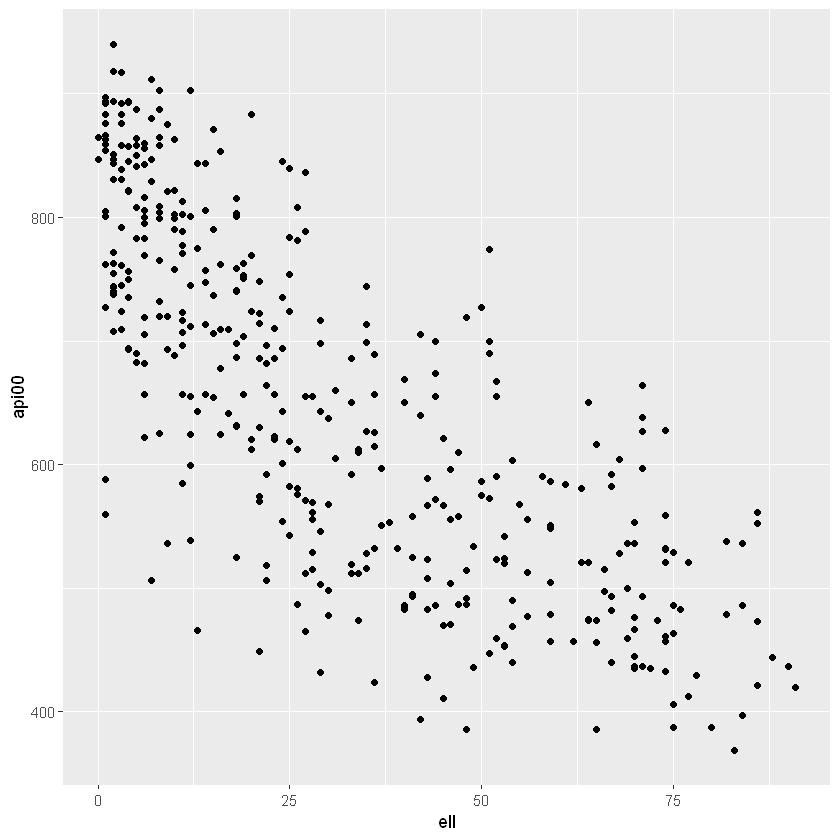

In [13]:
library(ggplot2)
#api00 ~ ell + meals + yr_rnd + mobility + acs_k3 + acs_46 + full + emer + enroll
ggplot(df, aes(x = ell, y = api00)) +
  geom_point()


Or as scatter matrix as in the following collection of plots.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ stringr   1.5.0
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removing 1 row that contained a missing value"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 2 rows containing missing values"
Wa

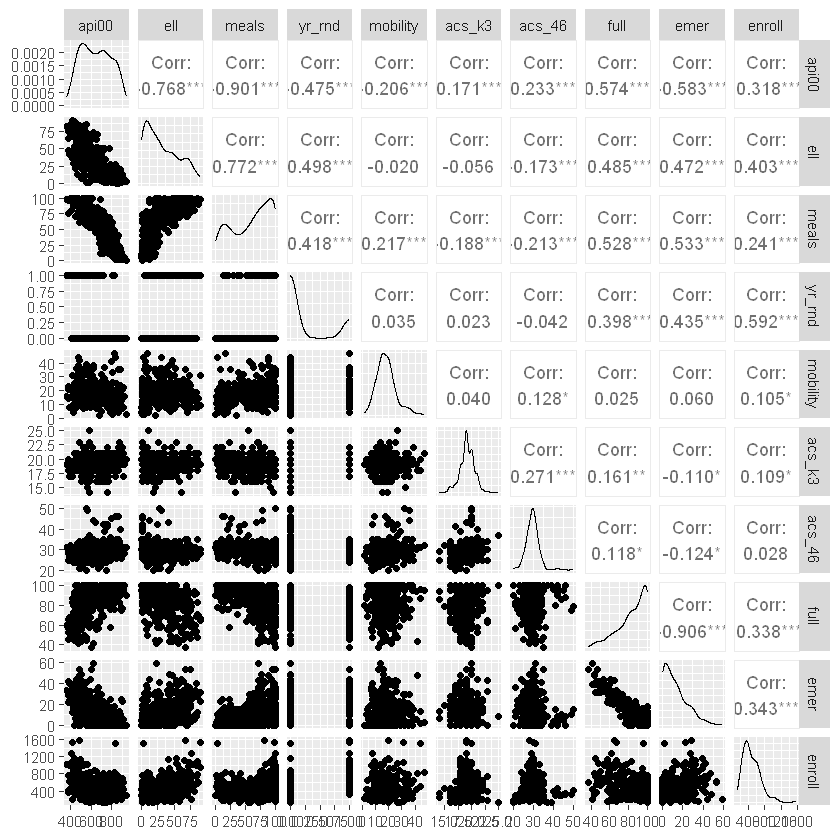

In [14]:
library(GGally)
library(tidyverse)
#api00 ~ ell + meals + yr_rnd + mobility + acs_k3 + acs_46 + full + emer + enroll
ggpairs(df %>% select(api00, ell, meals, yr_rnd, mobility, acs_k3, acs_46, full, emer, enroll))

Look at the distribution with a QQ-plot.

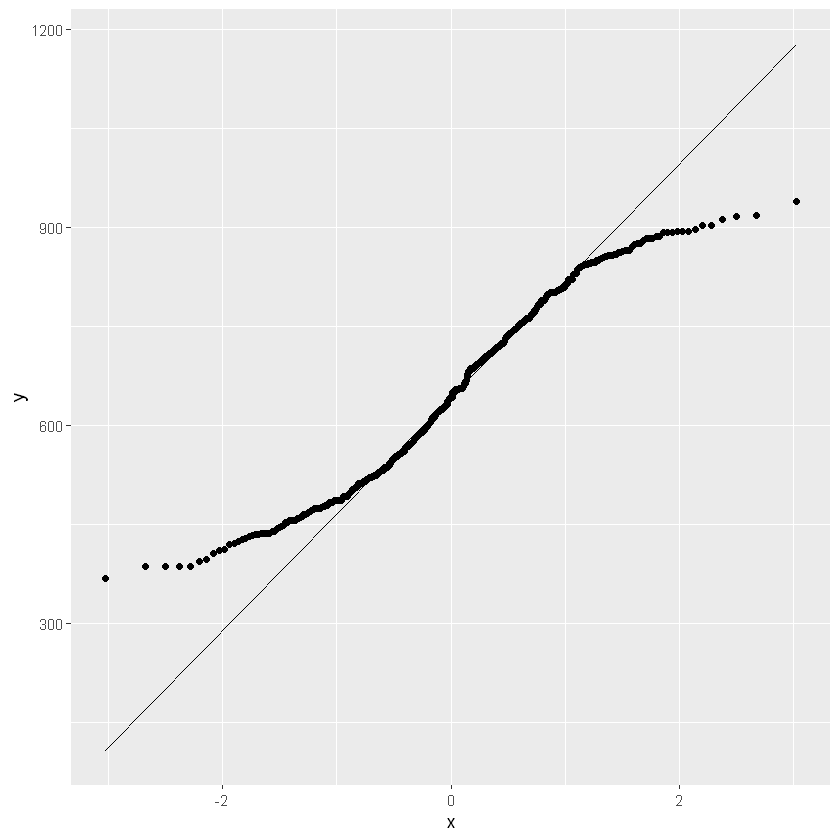

In [15]:
ggplot(df, aes(sample = api00)) + 
  geom_qq() +
  geom_qq_line()

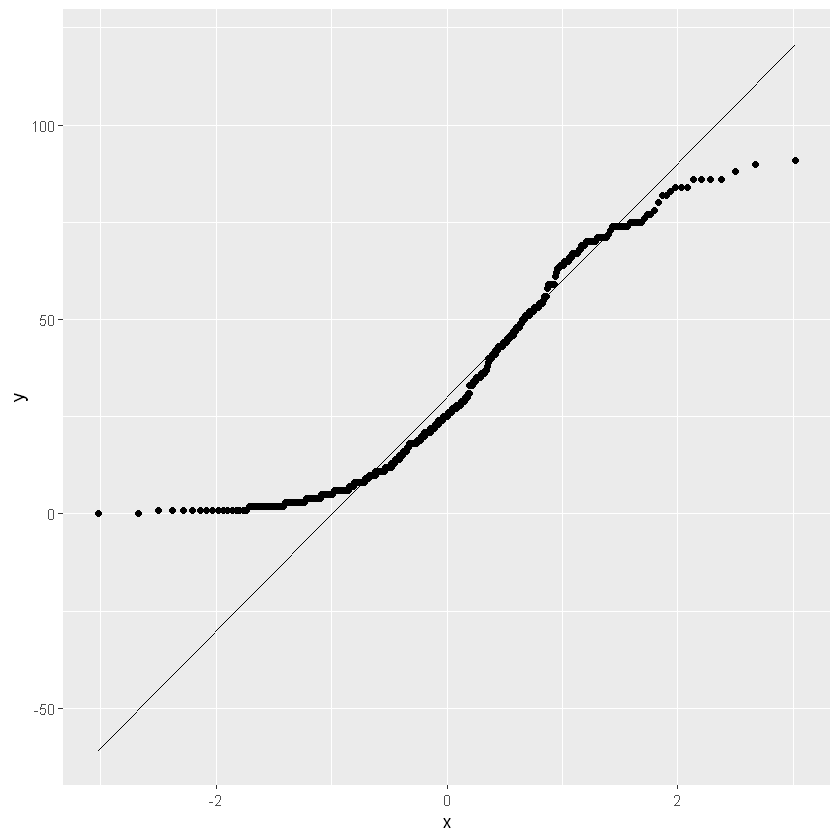

In [16]:
ggplot(df, aes(sample = ell)) + 
  geom_qq() +
  geom_qq_line()

## Assumptions of linear regression

- Linearity: There must be a linear relationship between the dependent and independent variables.
- Homoscedasticity: The residuals must have a constant variance.
- Normality: Normally distributed error.
- No auto correlation: The error component should have no auto correlation.
- No multicollinearity: No high correlation between the independent variables (for multiple linear regression).
- Independence of the observations: Result of the data generating mechanism.


The linearity can be assessed by inspection of the scatter plot above.

For the next assumption the model has to be fitted to calculate the residuals. The residuals are the differences between the observed and the fitted values.

In [17]:
library(broom)
my_lm <- lm(api00 ~ ell + meals + yr_rnd + mobility + acs_k3 + acs_46 + full + emer + enroll, data = df)
df <- augment(my_lm)
head(df)


.rownames,api00,ell,meals,yr_rnd,mobility,acs_k3,acs_46,full,emer,enroll,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,693,9,67,0,11,16,22,76,24,247,631.5440,61.456005,0.03591799,56.75216,4.529017e-03,1.1025618
2,570,21,92,0,33,15,32,79,19,463,540.6287,29.371330,0.04479091,56.82128,1.314109e-03,0.5293830
3,546,29,97,0,36,17,25,68,29,395,490.5673,55.432727,0.03365173,56.76909,3.436084e-03,0.9933333
4,571,27,90,0,27,20,30,87,11,418,562.7794,8.220567,0.01466818,56.84040,3.168151e-05,0.1458835
5,478,30,89,0,44,18,31,87,13,520,537.7655,-59.765544,0.03649873,56.75699,4.357789e-03,-1.0725569
6,858,3,10,0,10,20,33,100,0,343,864.1102,-6.110193,0.01234021,56.84111,1.465577e-05,-0.1083046


Plot the residuals on the y-axis against the dependent variable on the x-axis to look for homoscedasticity.

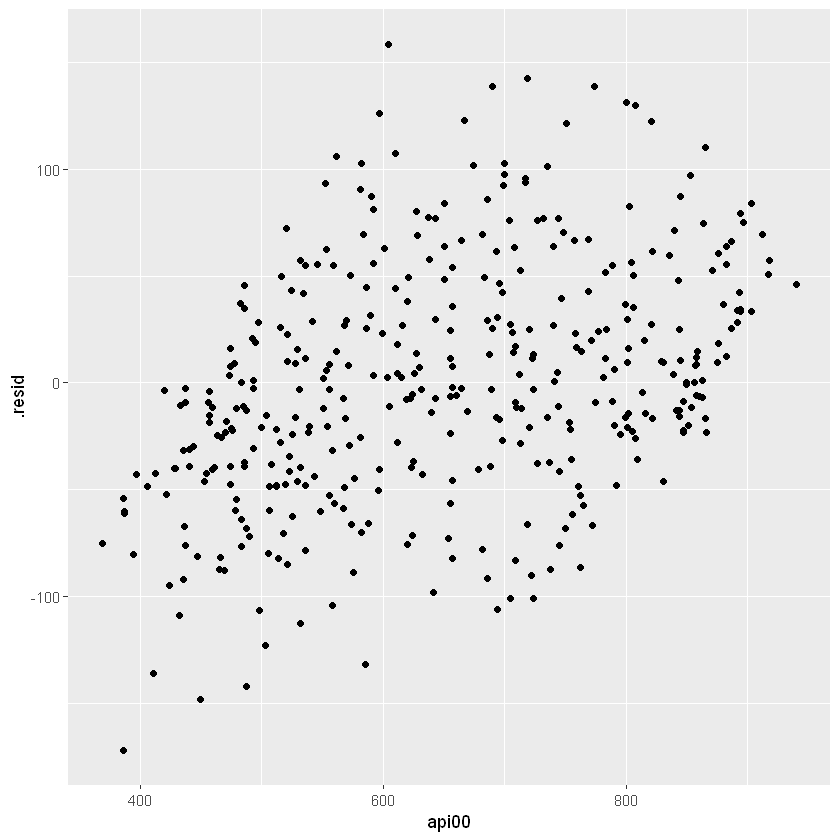

In [18]:
# Homoscedasticity
ggplot(df, aes(x = api00, y = .resid)) +
  geom_point()

Look for the normal distribution of the residuals with a QQ-plot.

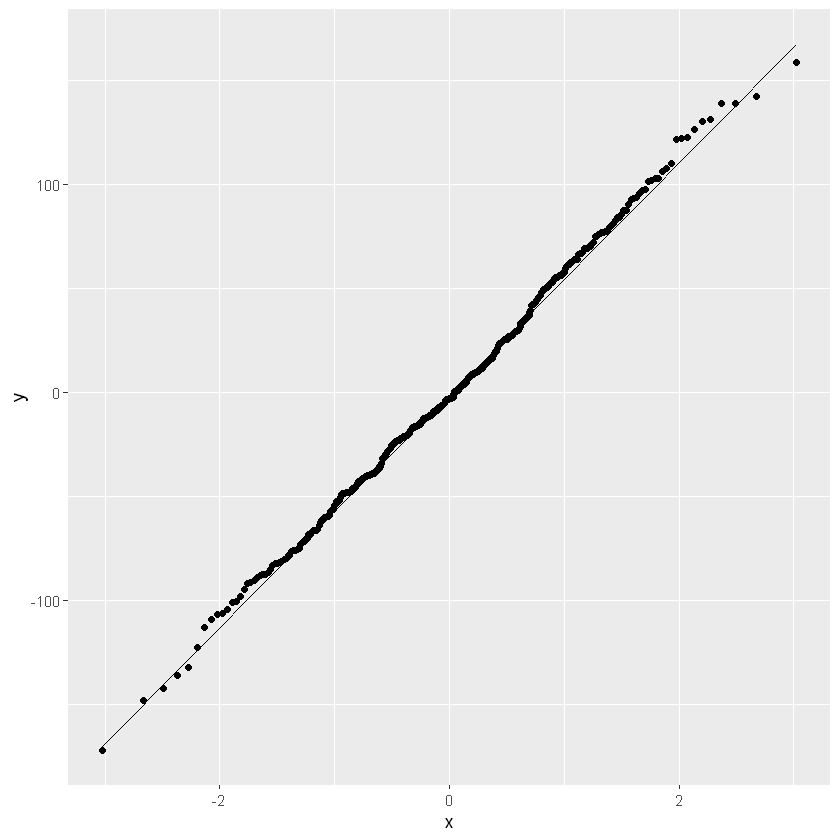

In [19]:
# Normal distribution of the error
ggplot(df, aes(sample = .resid)) +
  geom_qq() + 
  geom_qq_line()

Durbin-Watson-Test for auto correlation

In [20]:
# Autocorrelation
library(car)
durbinWatsonTest(my_lm, max.lag = 2)

Lade nötiges Paket: carData


Attache Paket: 'car'


Das folgende Objekt ist maskiert 'package:dplyr':

    recode


Das folgende Objekt ist maskiert 'package:purrr':

    some




 lag Autocorrelation D-W Statistic p-value
   1       0.2865527      1.423474   0.000
   2       0.1043084      1.786928   0.028
 Alternative hypothesis: rho[lag] != 0

Look for multicollinearity with the variance inflation factor (VIF)

-  VIF = 1: No correlation between a given predictor variable and any other predictor variables in the model.
-  
1 < VIF <= 5: Moderate correlation between a given predictor variable and other predictor variables in the model
-  
VIF > 5: Severe correlation between a given predictor variable and other predictor variables in the mode l.

In [21]:
vif(my_lm)

ell    meals   yr_rnd mobility   acs_k3   acs_46     full     emer 
3.323382 3.609285 1.877156 1.310977 1.170977 1.154830 6.139067 6.118585 
  enroll 
1.768202

## Summary of model

In [22]:
summary(my_lm)


Call:
lm(formula = api00 ~ ell + meals + yr_rnd + mobility + acs_k3 + 
    acs_46 + full + emer + enroll, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-171.934  -39.294   -2.973   36.096  158.440 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 758.94179   62.28601  12.185  < 2e-16 ***
ell          -0.86007    0.21063  -4.083  5.4e-05 ***
meals        -2.94822    0.17035 -17.307  < 2e-16 ***
yr_rnd      -19.88875    9.25844  -2.148  0.03232 *  
mobility     -1.30135    0.43621  -2.983  0.00303 ** 
acs_k3        1.31870    2.25268   0.585  0.55863    
acs_46        2.03246    0.79832   2.546  0.01129 *  
full          0.60972    0.47582   1.281  0.20083    
emer         -0.70662    0.60541  -1.167  0.24386    
enroll       -0.01216    0.01679  -0.724  0.46927    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 56.77 on 385 degrees of freedom
  (5 Beobachtungen als fehlend gelöscht)
Mul

In [23]:
glance(my_lm)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8445503,0.8409164,56.7681,232.4095,1.183585e-149,9,-2150.811,4323.623,4367.39,1240708,385,395


In [24]:
tidy(my_lm)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),758.94179320,62.28600730,12.1847880,4.134890e-29
ell,-0.86007067,0.21063175,-4.0832907,5.402931e-05
meals,-2.94821634,0.17034524,-17.3073006,4.715844e-50
yr_rnd,-19.88874706,9.25844226,-2.1481742,3.232329e-02
mobility,-1.30135168,0.43620533,-2.9833466,3.032785e-03
acs_k3,1.31870017,2.25268291,0.5853909,5.586278e-01
acs_46,2.03245622,0.79832127,2.5459126,1.128813e-02
full,0.60971500,0.47582046,1.2813972,2.008254e-01
emer,-0.70661916,0.60540863,-1.1671772,2.438612e-01
